In [2]:
import os
!pip install -Uqq fastai duckduckgo_search

In [8]:
!pip install -Uqq duckduckgo_search
!pip install --upgrade duckduckgo_search


[notice] A new release of pip is available: 23.0.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
from duckduckgo_search import DDGS as ddgs
from fastcore.all import *
from fastdownload import download_url
from fastai.vision.all import *

In [15]:
def search_images(term, max_images=30):
    # Print the search term to the console
    print(f"Searching for '{term}'")

    ddgs_instance = ddgs()

    # Search for images using DuckDuckGo
    search_results = ddgs_instance.images(keywords=term)

    # Extract the URLs of the images from the search results
    # Use a list comprehension to get the 'image' field from each result
    # Limit the number of URLs to max_images
    image_urls = [next(iter(search_results)).get("image") for _ in range(max_images)]

    # Convert the list of image URLs to an L object (a functionally extended list class from fastai)
    return L(image_urls)


In [16]:

urls = search_images('bird photos', max_images=1)
urls[0]

Searching for 'bird photos'


'https://images.pexels.com/photos/326900/pexels-photo-326900.jpeg?cs=srgb&dl=wood-flight-bird-326900.jpg&fm=jpg'

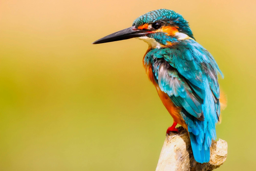

In [17]:
dest = 'bird.jpg'
download_url(urls[0], dest, show_progress=False)

im = Image.open(dest)
im.to_thumb(256,256)

Searching for 'forest'


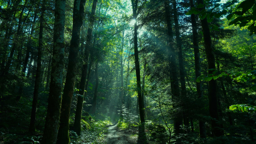

In [18]:
download_url(search_images('forest', max_images = 1)[0], 'forest.jpg', show_progress=False)
Image.open('forest.jpg').to_thumb(256,256)

In [20]:
searches = 'forest', 'bird'

path = Path('bird_or_forest')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls= search_images(f'{o} photo'))
    sleep(10)
    download_images(dest, urls= search_images(f'{o} sun photo'))
    sleep(10)
    download_images(dest, urls = search_images(f'{o} shade photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'forest photo'
Searching for 'forest sun photo'
Searching for 'forest shade photo'
Searching for 'bird photo'
Searching for 'bird sun photo'
Searching for 'bird shade photo'


In [21]:
#Now we will remove the improper downloaded images
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)

(#3) [None,None,None]

In [22]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

In [23]:

learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\AARON/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100%|█████████████████████████████████████████████████████████████████████████████| 44.7M/44.7M [00:12<00:00, 3.79MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.247783,0.000152,0.000000,00:50


epoch,train_loss,valid_loss,error_rate,time
0,0.000201,0.000013,0.000000,01:05
1,0.000119,0.000004,0.000000,01:05
2,0.000101,0.000000,0.000000,01:09


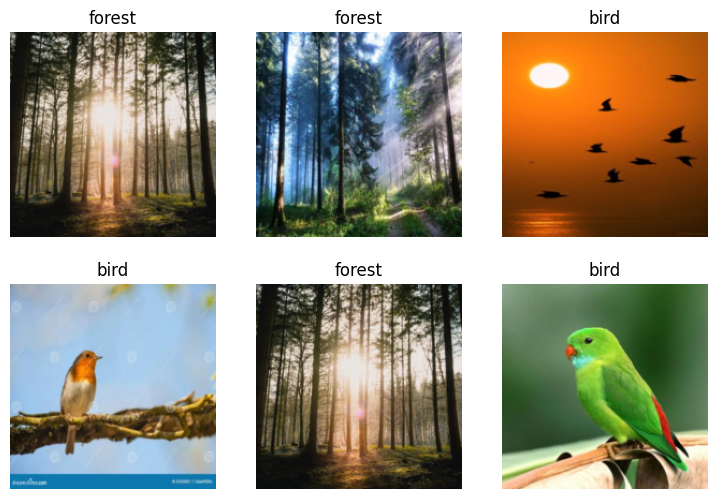

In [25]:
dls.show_batch(max_n=6)

In [24]:
#Now with this we will predict the model
is_bird,_,probs = learn.predict(PILImage.create('bird.jpg'))
print(f"This is a: {is_bird}.")
print(f"Probability it's a bird: {probs[0]:.4f}")

This is a: bird.
Probability it's a bird: 0.9901
